## Builder Pattern
The intent of this design is to separate the construction of a complex object from its representation so you can use the same construction process to create different representations.

### Terminology
- Product : The Product being built.
- Builder interface : The interface that the Concret builder should implement.
- (Concrete) Builder : Provides methods to build and retrieve the concrete product.
- Director : has a **construct()** method that creates a customized product using the methods of the Builder. 

### Builder UML diagram

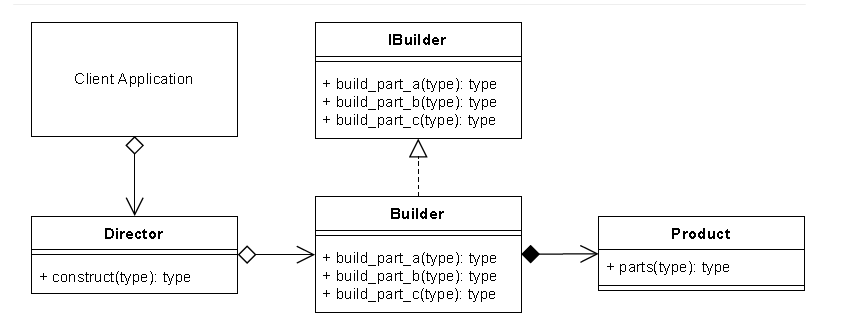

In [1]:
from PIL import Image
Image.open("../builder_pattern.png")

### Source Code
1. Client creates the Director
2. The client calss the Director's construct() method that manages each stepof the build process
3. The Director returns the product to client

In [2]:
from  abc import ABC, abstractmethod

class IBuilder(ABC):
    "The Builder Interface"
    
    @staticmethod
    @abstractmethod
    def build_part_a():
        "Build part a"

    @staticmethod
    @abstractmethod
    def build_part_b():
        "Build part b"

    @staticmethod
    @abstractmethod
    def build_part_c():
        "Build part c"
        
    @staticmethod
    @abstractmethod
    def get_result():
        "Return the final product"

In [3]:
class Builder(IBuilder):
    "The Concrete Builder."
    def __init__(self):
        self.product = Product()
        
    def build_part_a(self):
        self.product.parts.append('a')
        return self
    def build_part_b(self):
        self.product.parts.append('b')
        return self
    def build_part_c(self):
        self.product.parts.append('c')
        return self
    def get_result(self):
        return self.product

In [4]:
class Product():
    "The Product"
    def __init__(self):
        self.parts = []

In [5]:
class Director:
    "The Director, building a complex representation."
    @staticmethod
    def construct():
        "Constructs and returns the final product"
        return Builder()\
            .build_part_a()\
            .build_part_b()\
            .build_part_c()\
            .get_result()

In [6]:
PRODUCT = Director.construct()
print(PRODUCT.parts)

['a', 'b', 'c']


### Builder Use Case

Using the Builder Pattern in the context of House builder.<br><br>

There can be multiple directors that can create their own complex objects.<br><br>

The build can construct complex objects in any order and include/exclude whichever parts it likes.<br><br>

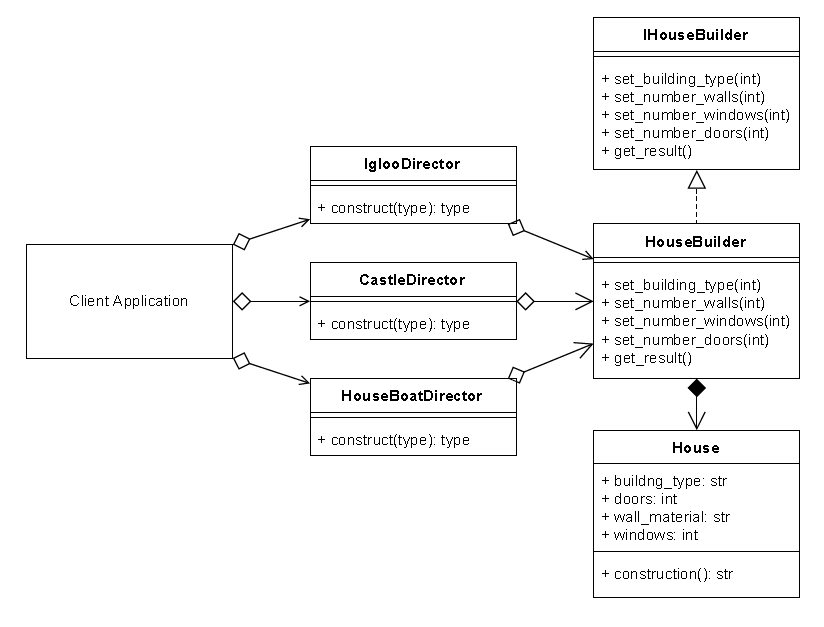

In [7]:
Image.open("../builder_pattern_example.png")

In [17]:
#./builder/house.py
class House():
    "The product"
    def __init__(self,building_type:str="Apartment",doors=0,windows=0,wall_material="Brick"):
        self.wall_material=wall_material
        self.building_type=building_type
        self.doors= doors
        self.windows=windows
        
    def construction(self):
        "Return a string describing the construction"
        return f"This is {self.wall_material} {self.building_type} with {self.doors} doors and {self.windows} windows."

In [13]:
#./builder/house_builder.py
from abc import ABC,abstractclassmethod

class IHouseBuilder(ABC):
    "The House Builder Interface"
    
    @staticmethod
    @abstractmethod
    def set_building_type(building_type:str):
        "Building Type"

    @staticmethod
    @abstractmethod
    def set_wall_material(wall_material:str):
        "wall_material"
        
    @staticmethod
    @abstractmethod
    def set_number_doors(number:int):
        "number_doors"

    @staticmethod
    @abstractmethod
    def set_number_windows(number:int):
        "number_windows"    
        
    @staticmethod
    @abstractmethod
    def get_result():
        "Return the final product"  
        
class HouseBuilder(IHouseBuilder):
    "The house builder"
    def __init__(self):
        self.house=House()

    def set_building_type(self,building_type:str):
        self.house.building_type = building_type
        return self


    def set_wall_material(self,wall_material:str):
        self.house.wall_material = wall_material
        return self

    def set_number_doors(self,number:int):
        self.house.doors = number
        return self


    def set_number_windows(self,number:int):
        self.house.windows = number
        return self
        
    def get_result(self):
        return self.house

In [14]:
#./builder/directors.py

class IglooDirector:
    "One of the Directors, that can build a complex representation."
    
    @staticmethod
    def construct():
        """Constructs and returns the final product.
            Note that in this IglooDirector, it has omitted the set_number_of
            windows call since this Igloo will have no windows.
        """
        return HouseBuilder() \
            .set_building_type("Igloo")\
            .set_wall_material("Ice")\
            .set_number_doors(1)\
            .get_result()


class CastleDirector:
    "One of the Directors, that can build a complex representation."
    
    @staticmethod
    def construct():
        """Constructs and returns the final product.
        """
        return HouseBuilder() \
            .set_building_type("Igloo")\
            .set_wall_material("Ice")\
            .set_number_doors(100)\
            .set_number_windows(200)\
            .get_result()

class HouseBoatDirector: 
    "One of the Directors, that can build a complex representation."
    @staticmethod
    def construct():
        "Constructs and returns the final product"
        return HouseBuilder()\
        .set_building_type("House Boat")\
        .set_wall_material("Wood")\
        .set_number_doors(6)\
        .set_number_windows(8)\
        .get_result()

In [19]:
#./builder/client.py

IGLOO = IglooDirector.construct()
CASTLE = CastleDirector.construct()
HOUSEBOAT = HouseBoatDirector.construct()

In [22]:
print(IGLOO.construction())
print(CASTLE.construction())
print(HOUSEBOAT.construction())

This is Ice Igloo with 1 doors and 0 windows.
This is Ice Igloo with 100 doors and 200 windows.
This is Wood House Boat with 6 doors and 8 windows.


### Summary

- The Builder pattern is a creational pattern that is used to create more complex objects than you'd expect from a factory.<br><br>

- The Builder pattern should be able to construct complex objects in any order and include/exclude whichever available components it likes.<br><br>

- You can use an **Abstract Factory** to add an abstraction between the client and Director.<br><br>